# Importing all the necessary libraries required

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Finding the null values in dataset

In [22]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Ploting the no. of survied passenger

<AxesSubplot:xlabel='Survived', ylabel='count'>

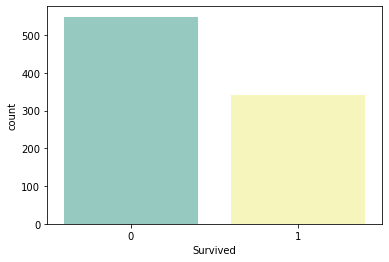

In [24]:
sns.countplot(x='Survived',data=training, palette='Set3')

In [ ]:
#Finding the relation between different features

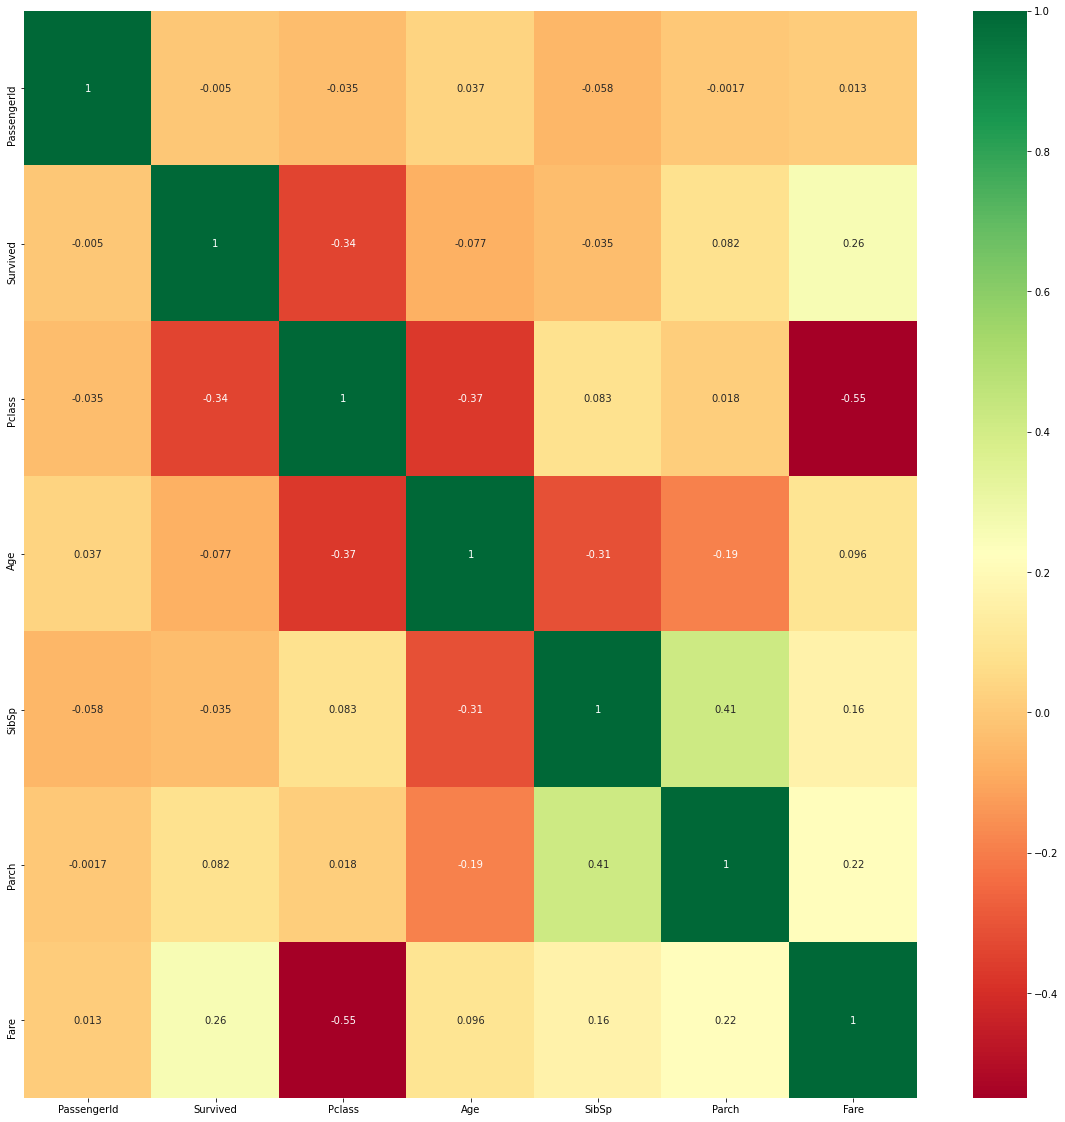

In [25]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(training.corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Combing train and test dat for the further operation

In [26]:
train_test_data = [training, test] 

In [ ]:
#as we can see the realation between the passenger class and age so we are finding the mean of passenger age in each 
#class and then replacing each null value in age with the average value of that class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

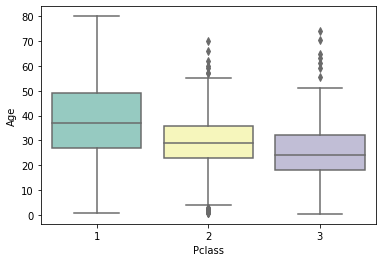

In [27]:
sns.boxplot(x='Pclass',y='Age',data=training,palette="Set3")

In [28]:
def age_approx(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 39
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [31]:
for dataset in train_test_data:
    dataset['Age'] = dataset[['Age','Pclass']].apply(age_approx,axis=True)

In [33]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#replacing the gender male and female with o for male and 1 foe female

In [35]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [36]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#replacing the embarked location to numerical value and also removing the null value

In [38]:
training.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [40]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
#finding wheather the person is traveling alone or with family

In [42]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (training[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [43]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (training[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [ ]:
#percentage of people survived travelling with family is high compare to people travelling alone 

In [44]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [45]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'IsAlone'],
      dtype='object')

In [ ]:
# droping the feature which are not necessary

In [50]:
train = training.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age','FamilySize','Fare'], axis=1)
test = test.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age','FamilySize','Fare'], axis=1)

KeyError: "['Name' 'SibSp' 'Parch' 'Ticket' 'Cabin' 'Age' 'FamilySize' 'Fare'] not found in axis"

In [55]:
train = train.drop(['PassengerId'], axis=1)

In [56]:
train.head(5)

,Survived,Pclass,Sex,Embarked,IsAlone
0,0,3,0,0,0
1,1,1,1,1,0
2,1,3,1,0,1
3,1,1,1,0,0
4,0,3,0,0,1


In [53]:
test.head(5)

,PassengerId,Pclass,Sex,Embarked,IsAlone
0,892,3,0,2,1
1,893,3,1,0,0
2,894,2,0,2,1
3,895,3,0,0,1
4,896,3,1,0,0


In [ ]:
#spliting the data for testing and training purpose

In [65]:
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
X_test =  test.drop("PassengerId", axis=1).copy()

In [66]:
X_test.shape

(418, 4)

In [100]:
# we are going to use Logistic Regressor for classification purpose

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred= model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix

In [86]:
y_pred_lr= model.predict(X_train)

In [ ]:
#Ploting the confusion matrix

In [88]:
confusion_matrix = confusion_matrix(y_train,y_pred_lr)
confusion_matrix

array([[457,  92],
       [100, 242]], dtype=int64)

In [112]:
true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']
matrix_plot = pd.DataFrame(confusion_matrix,index = true_class_names,columns = predicted_class_names)

<AxesSubplot:>

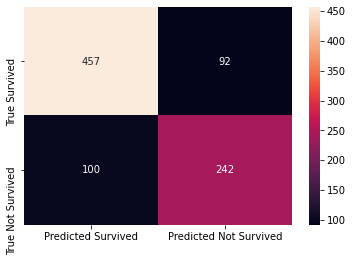

In [113]:
sns.heatmap(matrix_plot, annot=True, fmt='d')

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_train,y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.72       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



In [91]:
from sklearn.metrics import accuracy_score

In [92]:
test_score = accuracy_score(y_pred_lr, y_train)
print("Accuracy: {:.2f}%".format(test_score*100))

Accuracy: 78.45%


In [93]:
test.head()

,PassengerId,Pclass,Sex,Embarked,IsAlone
0,892,3,0,2,1
1,893,3,1,0,0
2,894,2,0,2,1
3,895,3,0,0,1
4,896,3,1,0,0


In [114]:
#for report submission

In [94]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": y_pred})


In [96]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
submission.to_csv('submission.csv', index=False)